In [1]:
# Load necessary libraries
import sys
import os
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)
import scimap as sm
import matplotlib.pyplot as plt
import squidpy as sq

import warnings
warnings.filterwarnings('ignore')


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.7.8 umap==0.5.3 numpy==1.22.3 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.3 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.7


In [3]:
sc.logging.print_header()

scanpy==1.9.1 anndata==0.7.8 umap==0.5.3 numpy==1.22.3 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.3 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.7


In [4]:
adata= sc.read_h5ad('data/figure6.h5ad')

### Phenotype cells

In [5]:
# read cell phenotype matrix for phenotyping using scimap
pheno = pd.read_csv('data/sm_phenotypes.csv', index_col=None, header=0)
pheno

,Unnamed: 0,Unnamed: 1,NeuN,GFAP,IBA1,Olig2
0,all,Neurons,pos,NaN,NaN,NaN
1,all,Astrocytes,NaN,pos,NaN,NaN
2,all,Microglia,NaN,NaN,pos,NaN
3,all,Oligodendrocytes,NaN,NaN,NaN,pos


In [8]:
# Compute scimap cell classification phenotypes
adata = sm.tl.phenotype_cells(adata, phenotype= pheno, gate=0.5)
# rename 'Unknown' aka unclassified cells to 'Other'
adata.obs.phenotype = adata.obs.phenotype.map({'Neurons':'Neurons',
                                                           'Astrocytes':'Astrocytes',
                                                           'Microglia':'Microglia',
                                                           'Oligodendrocytes':'Oligodendrocytes',
                                                           'Unknown':'Other'})

Phenotyping Neurons
Phenotyping Astrocytes
Phenotyping Microglia
Phenotyping Oligodendrocytes
Consolidating the phenotypes across all groups


In [9]:
# Display percentage of phenotypes per region and sample/ImageID
statsDF =100*adata.obs.groupby(['ImageID','Parent']).phenotype.value_counts()/adata.obs.groupby(['ImageID','Parent']).size()
statsDF = statsDF.reset_index()
statsDF.columns = ['ImageID','Parent','phenotype','percentage']


In [10]:
#Map 'Parent' to a new column 'Region' with the abbreviations
nameMap = {'Grey Matter':'GM','White Matter':'WM'}
statsDF['Region'] = statsDF.Parent.map(nameMap)


In [11]:
# assign colors to phenotypes
cMapDict={'Astrocytes': '#FDD835',
 'Microglia': '#00DBF2',
 'Neurons': '#4CAF50',
 'Oligodendrocytes': '#FF0055',
 'Other': '#3366FF'}

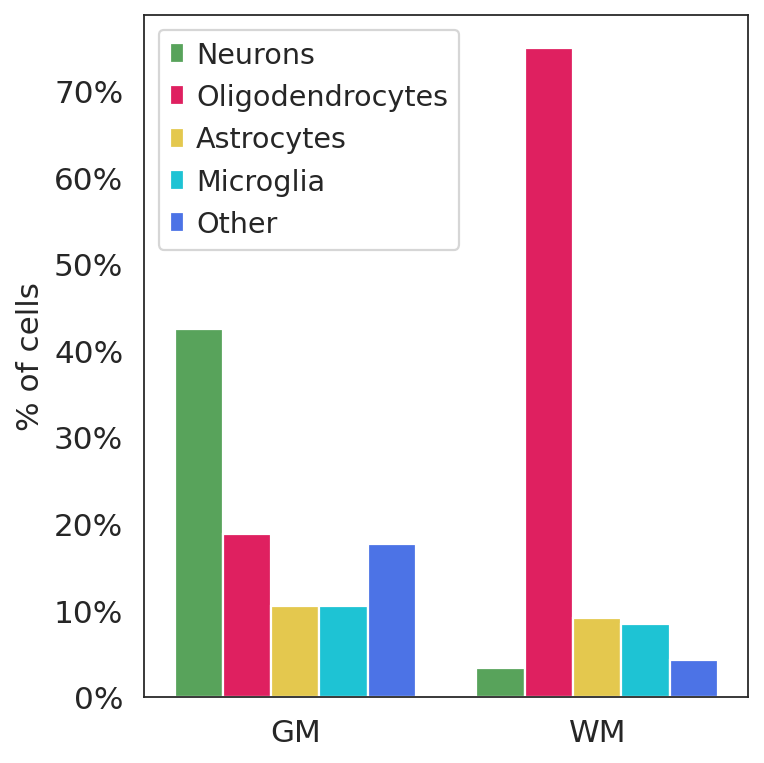

In [12]:
# plot cell type stats for Ctl-1 sample
sns.set_style('white')

fig,ax=plt.subplots(1,1,figsize=(5,5))
sns.barplot(data=statsDF[statsDF.ImageID=='Ctl-1'], x='Region', y ='percentage',hue='phenotype',orient='v',ax=ax,
            hue_order=['Neurons','Oligodendrocytes','Astrocytes','Microglia','Other'],
              palette=cMapDict)
ax.set_ylabel('% of cells')
ax.set_xlabel('')
ax.set_yticklabels(['0%','10%','20%','30%','40%','50%','60%','70%'])
plt.legend(title='',facecolor=None)
plt.tight_layout()


### Plot spatial map

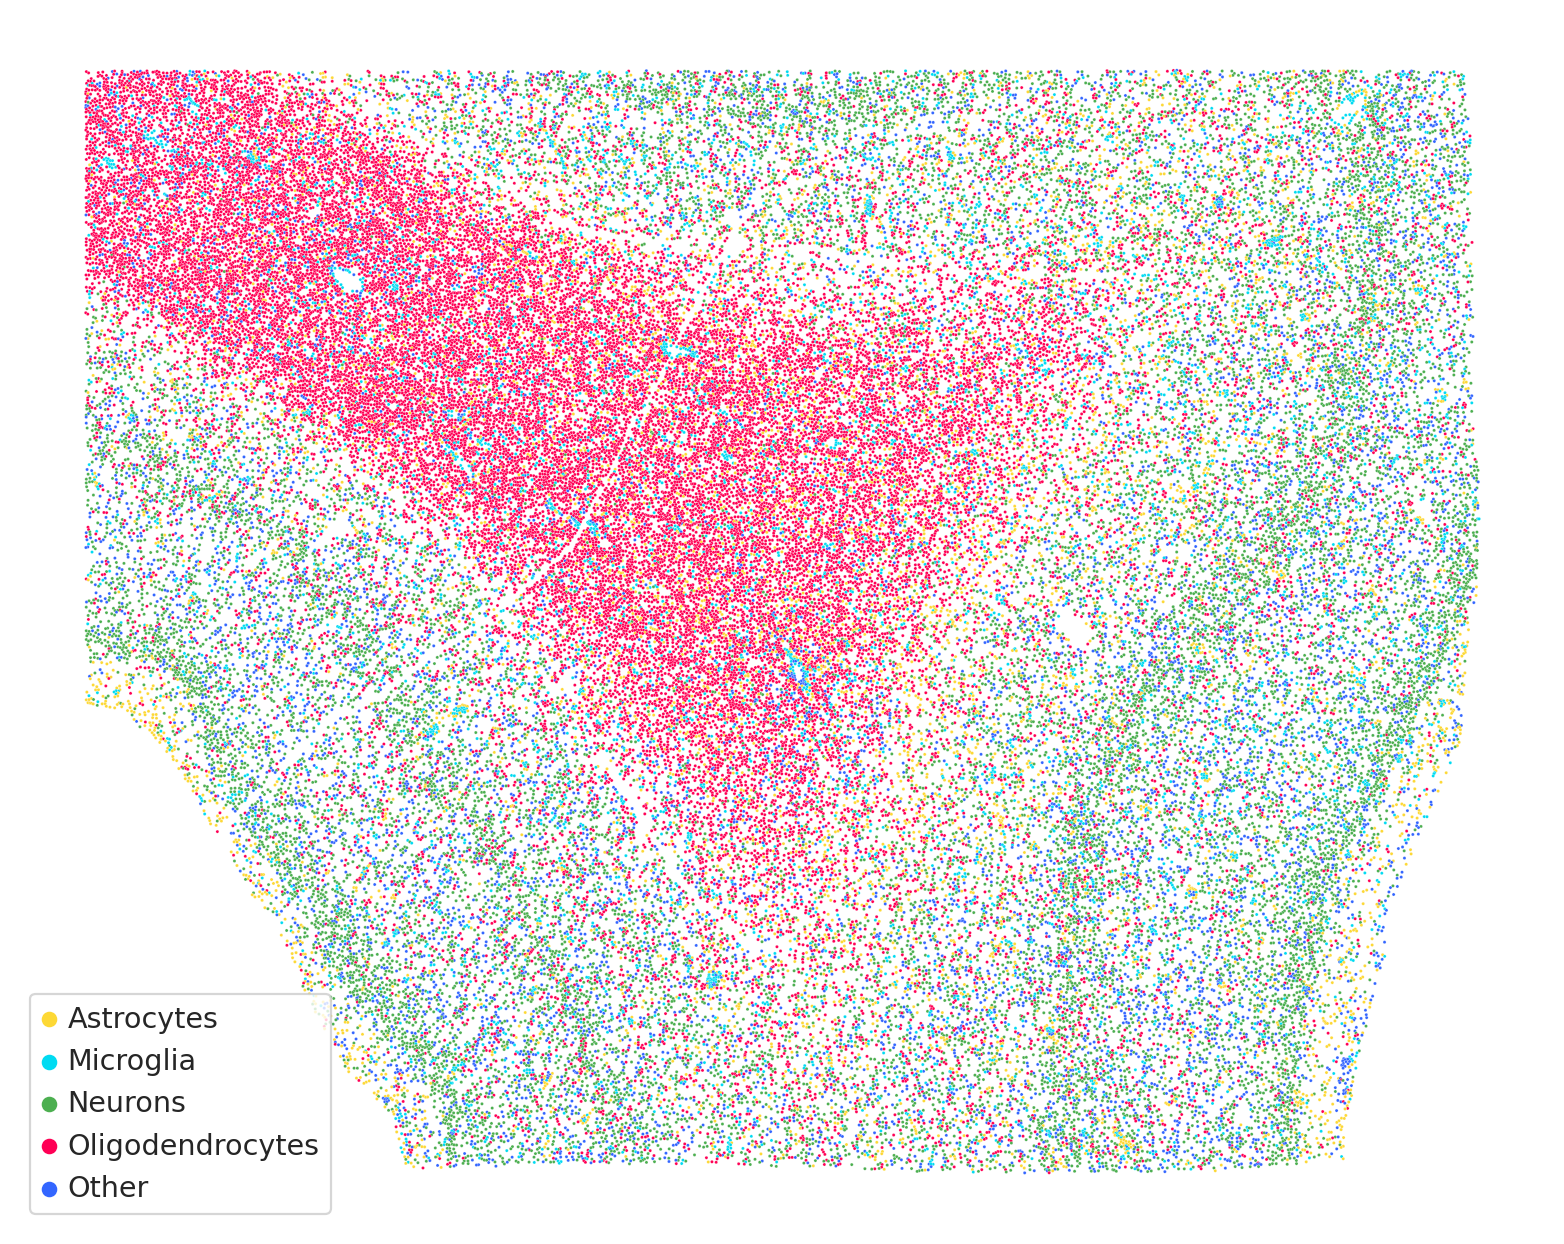

In [18]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
sns.set_style('white')
ss = adata[adata.obs.ImageID=='Ctl-1']

sns.scatterplot(data=ss.obs,x='spatial_X',y='spatial_Y',hue='phenotype', 
                palette=cMapDict, s=2)
ax.invert_yaxis()
plt.axis('off')
ax.legend(title='')
plt.tight_layout()


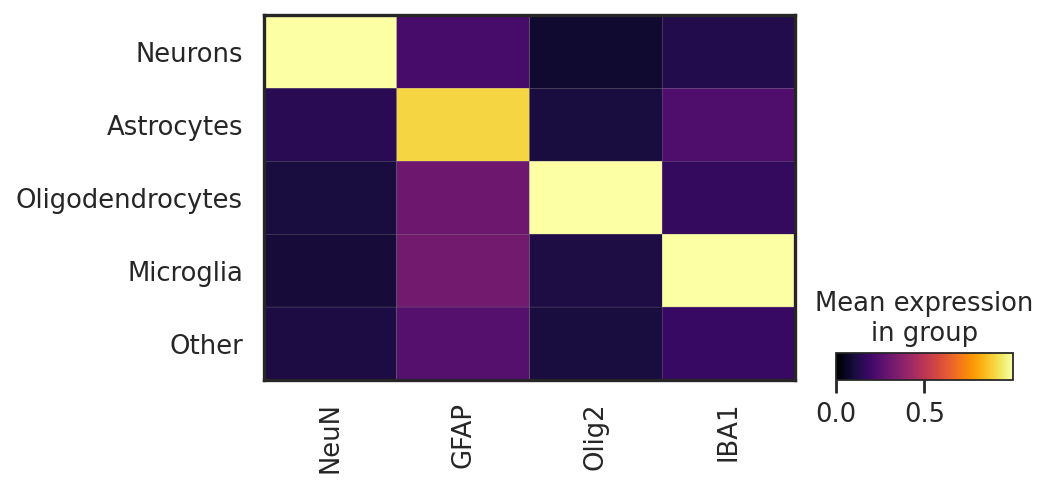

In [16]:
# plot expression heatmap
sc.pl.matrixplot(adata, groupby='phenotype', figsize=(6,3),var_names=['NeuN','GFAP','Olig2','IBA1'],categories_order = ['Neurons','Astrocytes','Oligodendrocytes','Microglia','Other'],
                 dendrogram=False, use_raw=False, cmap="inferno",standard_scale=None,vmin=-0.0,vmax=0.7,vcenter=0.5)